In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 1 Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately

In [391]:
claim=pd.read_csv('claims.csv')
cust=pd.read_csv('cust_demographics.csv')
df = pd.merge(claim,cust, left_on='customer_id', right_on='CUST_ID', how='inner')
df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### 2.  Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [392]:
df.dtypes

#result:
  #claim_id expected as object   (reason: it makes no sense on doing arithmetic operation on claim_id)
  #customer_id expected as object(reason: same as claim id)
  #incident_cause expected as object
  #claim_date expected as datetime datatype
  #claim_area expected as object
  #claim_amount expected as float
  #fraudulent expected as boolean
  #gender expected as object
  #DateOfBirth expected as datetime datatype
  #State expected as object
  #Contact expected as object
  #Segment expected as object

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

### 3.Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the  $ sign.

In [393]:
df['claim_amount'] = df['claim_amount'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Arth\AppData\Local\Temp\ipykernel_9920\2571852817.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['claim_amount'] = df['claim_amount'].str.replace('$', '').str.replace(',', '').astype(float)


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [394]:
#Create a new column called "police_reported" and initialize it with 0
df['police_reported'] = 0

#Use boolean indexing to identify injury claims with no police report
injury_claims_no_police_report = (df['claim_type'] == 'Injury only') & (df['police_report'] == 'No')

#Update the "police_reported" column for the identified claims to 1
df.loc[injury_claims_no_police_report, 'police_reported'] = 1

### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [395]:
df['claim_date'] = pd.to_datetime(df['claim_date'])

df.sort_values(by='claim_date', ascending=False, inplace=True)

df.drop_duplicates(subset='customer_id', keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)

df


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_reported
0,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,93915431,Male,08-Sep-67,ME,134-785-1687,Gold,0
1,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,38011078,Female,20-May-76,NE,271-123-1475,Gold,0
2,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,58451506,Male,22-Apr-68,FL,673-574-7823,Gold,0
3,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,46710738,Male,28-Apr-77,MO,962-834-9361,Gold,0
4,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,77510822,Female,18-Mar-86,AK,436-934-7156,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,77219712,Female,05-Aug-99,NH,649-592-8793,Platinum,0
1074,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,42664554,Female,13-Aug-93,TN,396-973-2531,Gold,1
1075,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,64840478,Female,14-Feb-74,NM,918-174-7461,Silver,0
1076,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,74155265,Male,16-Nov-85,TX,392-739-4873,Gold,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [396]:
df.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
police_reported         0
dtype: int64

In [397]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_id,1078.0,4.900244e+07,2.912276e+07,26832.0,24092362.0,49034923.0,74135404.00,99775483.0
customer_id,1078.0,5.078005e+07,2.851431e+07,154557.0,26460249.5,49790067.0,76069233.75,99961993.0
claim_amount,1013.0,1.250173e+04,1.378513e+04,1000.0,1870.0,2740.0,24380.00,48150.5
total_policy_claims,1068.0,1.588951e+00,1.148957e+00,1.0,1.0,1.0,2.00,8.0
CUST_ID,1078.0,5.078005e+07,2.851431e+07,154557.0,26460249.5,49790067.0,76069233.75,99961993.0
police_reported,1078.0,5.473098e-02,2.275600e-01,0.0,0.0,0.0,0.00,1.0


In [398]:
df['claim_amount'].fillna(df['claim_amount'].mean(), inplace=True)
df['total_policy_claims'].fillna(df['total_policy_claims'].mode()[0], inplace=True)

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [399]:
df['DateOfBirth']=pd.to_datetime(df['DateOfBirth'], format='%d-%b-%y')
import datetime
current_date = datetime.date.today()

#to fix year since some years are like 2068 or something
def fix_year(date):
    if date.year > 2000:
        return date.replace(year=date.year - 100)
    else:
        return date
df['DateOfBirth'] = df['DateOfBirth'].apply(fix_year)

df['Age'] = current_date.year - df['DateOfBirth'].dt.year


#age category
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif age >= 18 and age <= 30:
        return 'Youth'
    elif age > 30 and age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['Age Category'] = df['Age'].apply(categorize_age)

### 8.What is the average amount claimed by the customers from various segments?

In [400]:
pd.pivot_table(data=df, values='claim_amount', index='Segment', aggfunc='mean')

,claim_amount
Segment,
Gold,12846.400227
Platinum,12371.654843
Silver,12267.859374


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [401]:
from datetime import datetime

df['claim_date'] = pd.to_datetime(df['claim_date'], format='%m/%d/%Y')

threshold_date = datetime(2018, 10, 1) - pd.DateOffset(days=20)

filtered_df = df[df['claim_date'] <= threshold_date]
total_claim_amount_by_cause = filtered_df.groupby('incident_cause')['claim_amount'].sum()

total_claim_amount_by_cause

incident_cause
Crime                 7.219386e+05
Driver error          3.315851e+06
Natural causes        1.312987e+06
Other causes          3.723152e+06
Other driver error    3.277536e+06
Name: claim_amount, dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [402]:
df2 = df[(df['Age Category'] == 'Adult') & ((df['State'] == 'TX') | (df['State'] == 'DE') | (df['State'] == 'AK'))]
df3=df2[(df2['incident_cause']=='Other driver error') | (df2['incident_cause']=='Driver error')]
len(df3)

27

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

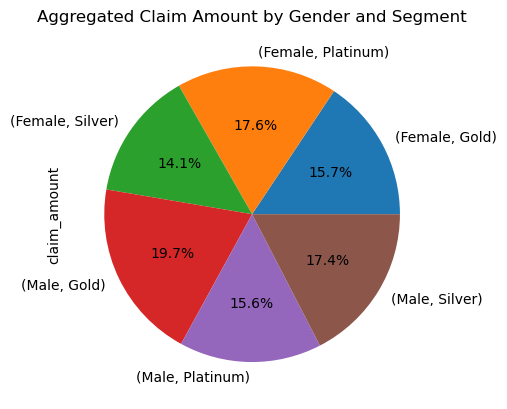

In [403]:
agg_d = df.groupby(['gender', 'Segment'])['claim_amount'].sum()

agg_d.plot(kind='pie', autopct='%1.1f%%', legend=False)


plt.title("Aggregated Claim Amount by Gender and Segment")

plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

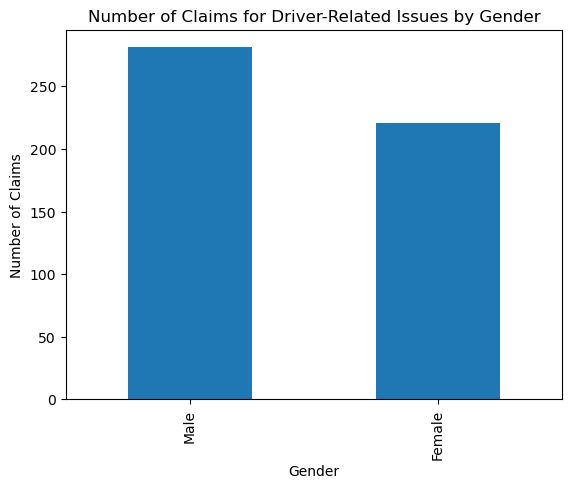

In [404]:
df4=df[(df['incident_cause']=='Other driver error') | (df['incident_cause']=='Driver error')]
df5 = df4['gender'].value_counts()
df5.plot(kind='bar')
plt.title("Number of Claims for Driver-Related Issues by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Claims")
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

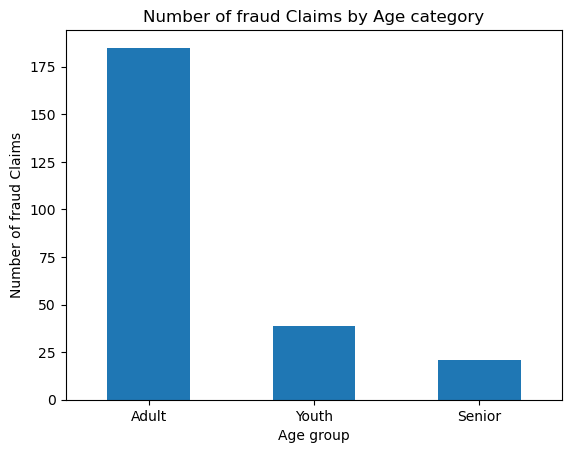

In [405]:
df7=df[df['fraudulent']=='Yes']
df8 = df7['Age Category'].value_counts()
df8.plot(kind='bar')
plt.title("Number of fraud Claims by Age category")
plt.xlabel("Age group")
plt.ylabel("Number of fraud Claims")
plt.xticks(rotation=0)
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

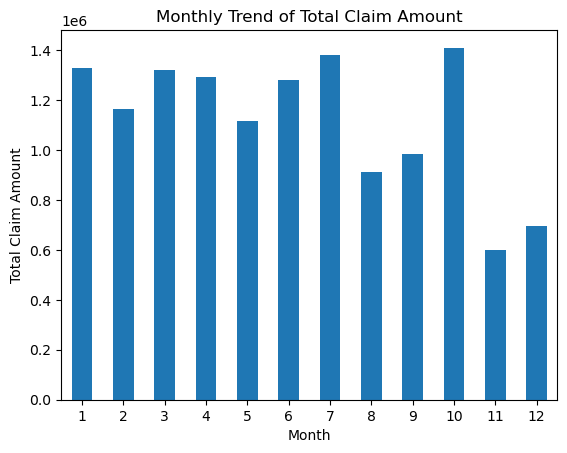

In [406]:
df10=df.groupby(df['claim_date'].dt.month)['claim_amount'].sum()
df10.plot(kind='bar')
plt.title("Monthly Trend of Total Claim Amount")
plt.xlabel("Month")
plt.ylabel("Total Claim Amount")
plt.xticks(rotation=0)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

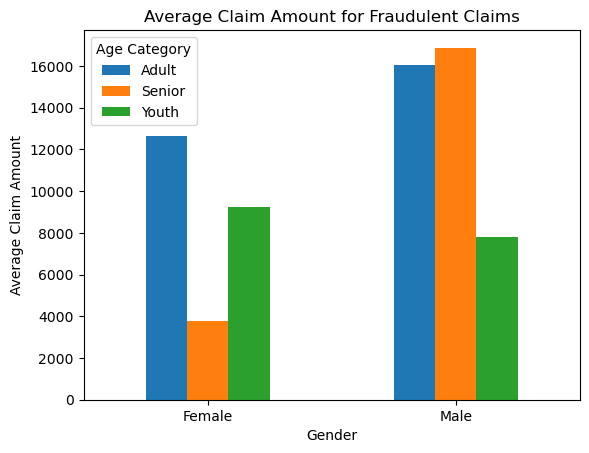

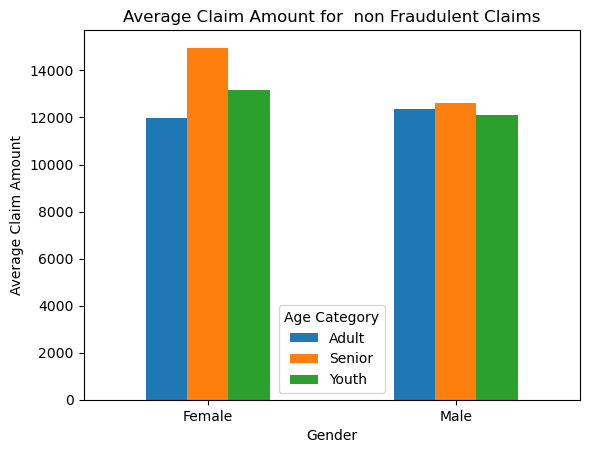

In [407]:
fraud=df[df['fraudulent'] == 'Yes']
avg_fraud=pd.pivot_table(data=fraud,values='claim_amount',index='gender',columns='Age Category',aggfunc='mean')
avg_fraud.plot(kind='bar')
plt.title("Average Claim Amount for Fraudulent Claims")
plt.xlabel("Gender")
plt.ylabel("Average Claim Amount")
plt.xticks(rotation=0)
plt.show()


non_fraud=df[df['fraudulent'] == 'No']
avg_non_fraud=pd.pivot_table(data=non_fraud,values='claim_amount',index='gender',columns='Age Category',aggfunc='mean')
avg_non_fraud.plot(kind='bar')
plt.title("Average Claim Amount for  non Fraudulent Claims")
plt.xlabel("Gender")
plt.ylabel("Average Claim Amount")
plt.xticks(rotation=0)
plt.show()

# Hypothesis Testing

### 16. Is there any similarity in the amount claimed by males and females?

In [408]:
#test usage: anova (since male and female are coming from different sets)
    #H0: avg_male_Claim=avg_female_claim
    #H1: avg_male_Claim≠avg_female_claim
males_claim_amount = df[df['gender'] == 'Male']['claim_amount']
females_claim_amount = df[df['gender'] == 'Female']['claim_amount']

stats.f_oneway(males_claim_amount, females_claim_amount)

#result 
  #assume alpha=0.01
   # since pvalue>alpha
   # =>we cannot reject null hypothesis 
   # so There is no significant difference in claim amounts between males and females

F_onewayResult(statistic=0.9264242385640077, pvalue=0.3360100613538194)

### 17. Is there any relationship between age category and segment?

In [409]:
#for two categorical variables use chi-square test
    #H0: There is no relationship between age category and segment.
    #H1: There is relationship between age category and segment.
obs_frq = pd.crosstab(df['Age Category'], df['Segment'])
statist,pval,d,f=stats.chi2_contingency(obs_frq)

pval

#result 
  #assume alpha=0.01
   # since pvalue>alpha
   # =>we cannot reject null hypothesis
   # so yes There is no relationship between age category and segment.

0.9555179463691874

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [410]:
#test usage: 1 sample t test (since we need to compare whether current claim amount>10000 or not)
 #H0: current year claim=10000$
 #H1: current year claim>10000$
stats.ttest_1samp(a=df['claim_amount'],popmean=10000)

#result 
  #assume alpha=0.01
   # since pvalue<alpha
     # => reject null hypothesis
            #The test suggests that the current year has shown a significant rise in claim amounts 
            #compared to the 2016-17 fiscal year average of $10,000.

TtestResult(statistic=6.146897188063236, pvalue=1.1110879097327439e-09, df=1077)

### 19. Is there any difference between age groups and insurance claims?

In [411]:
df['Age Category'].unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [412]:
#test usage: anova 
    #H0: avg_adult_Claim=avg_youth_claim=avg_senior_claim
    #H1: not all equal

df_adult=df[df['Age Category']=='Adult']['claim_amount']
df_youth=df[df['Age Category']=='Youth']['claim_amount']
df_senior=df[df['Age Category']=='Senior']['claim_amount']

stats.f_oneway(df_adult,df_youth,df_senior)

#result 
  #assume alpha=0.01
   # since pvalue>alpha
   # =>we cannot reject null hypothesis 
   # so There is no significant difference in claim amounts among different age groups

F_onewayResult(statistic=0.3364389980428646, pvalue=0.7143846417070969)

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [413]:
df['total_policy_claims'] = df['total_policy_claims'].astype(int)

In [414]:
# to know different number of total policy claims
df['total_policy_claims'].unique() 

array([1, 2, 3, 4, 6, 5, 8, 7])

In [415]:
#test usage : ANOVA 
    #H0: The average claim amounts are equal across all different total numbers of policy claims.
    #H1: Not all the averages are equal; there is at least one group with a different mean.

df_1=df[df['total_policy_claims']==1]['claim_amount']
df_2=df[df['total_policy_claims']==2]['claim_amount']
df_3=df[df['total_policy_claims']==3]['claim_amount']
df_4=df[df['total_policy_claims']==4]['claim_amount']
df_5=df[df['total_policy_claims']==5]['claim_amount']
df_6=df[df['total_policy_claims']==6]['claim_amount']
df_7=df[df['total_policy_claims']==7]['claim_amount']

stats.f_oneway(df_1,df_2,df_3,df_4,df_5,df_6,df_7)

#result 
  #assume alpha=0.01
   # since pvalue>alpha
   # =>we cannot reject null hypothesis
    #so There is no significant difference in claim amounts across all different total numbers of policy claims.

F_onewayResult(statistic=0.8983136268048669, pvalue=0.49529283846993366)